<a href="https://colab.research.google.com/github/icaroandri/Desafio-Alura-Store/blob/main/telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TELECOM X

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

extraindo


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL da base no GitHub
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Carregar os dados
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


transformando


In [ ]:
# Expandindo cada coluna aninhada
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


charges_df = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))

#juntar ttudo
df_clean = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df.drop(columns=['Charges'], errors='ignore'), charges_df],
    axis=1
)

print("Dataset após normalização:")
print(df_clean.head())
print(df_clean.info())


Dataset após normalização:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            No             DSL  ...         Yes         Yes   
1          Yes           Yes             DSL  ...          No          No   
2          Yes            No     Fiber optic  ...          No          No   
3          Yes            No     Fiber optic  ...          No         Yes   
4          Yes            No     Fiber optic  ...         Yes         Yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \

limpando e removendo incosistencias


In [ ]:

df_clean['Total'] = pd.to_numeric(df_clean['Total'], errors='coerce')


print("Valores nulos:")
print(df_clean.isnull().sum())


df_clean['Total'] = df_clean['Total'].fillna(0)


Valores nulos:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total        0
Monthly              0
Total               11
dtype: int64


In [ ]:
#gasto diário médio
df_clean['DailyCharges'] = df_clean['Monthly'] / 30

#$ esperado ao longo do contrato
df_clean['ExpectedTotal'] = df_clean['tenure'] * df_clean['Monthly']

print(df_clean[['Monthly', 'DailyCharges', 'Total', 'ExpectedTotal']].head())


   Monthly  DailyCharges    Total  ExpectedTotal
0     65.6      2.186667   593.30          590.4
1     59.9      1.996667   542.40          539.1
2     73.9      2.463333   280.85          295.6
3     98.0      3.266667  1237.85         1274.0
4     83.9      2.796667   267.40          251.7


DESCRIÇÃO


Resumo estatístico:
       SeniorCitizen       tenure  Charges.Monthly      Monthly        Total  \
count    7267.000000  7267.000000      7267.000000  7267.000000  7267.000000   
mean        0.162653    32.346498        64.720098    64.720098  2277.182035   
std         0.369074    24.571773        30.129572    30.129572  2268.648587   
min         0.000000     0.000000        18.250000    18.250000     0.000000   
25%         0.000000     9.000000        35.425000    35.425000   396.200000   
50%         0.000000    29.000000        70.300000    70.300000  1389.200000   
75%         0.000000    55.000000        89.875000    89.875000  3778.525000   
max         1.000000    72.000000       118.750000   118.750000  8684.800000   

       DailyCharges  ExpectedTotal  
count   7267.000000    7267.000000  
mean       2.157337    2277.033563  
std        1.004319    2266.544961  
min        0.608333       0.000000  
25%        1.180833     393.900000  
50%        2.343333    1389.500000  


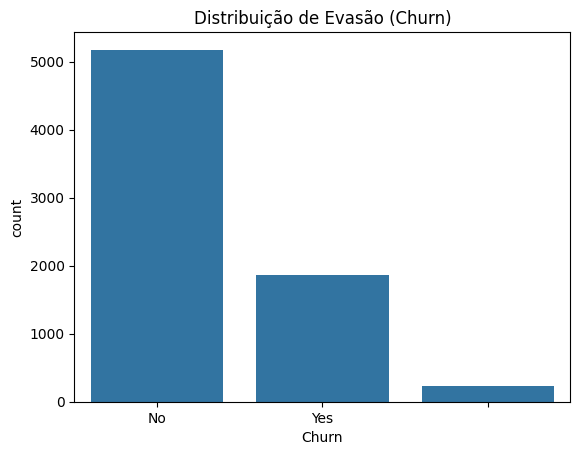

In [ ]:
print("Resumo estatístico:")
print(df_clean.describe())

#a distribuicao de churn
sns.countplot(x='Churn', data=df_clean)
plt.title("Distribuição de Evasão (Churn)")
plt.show()


#Comparação de evasão por variáveis categóricas

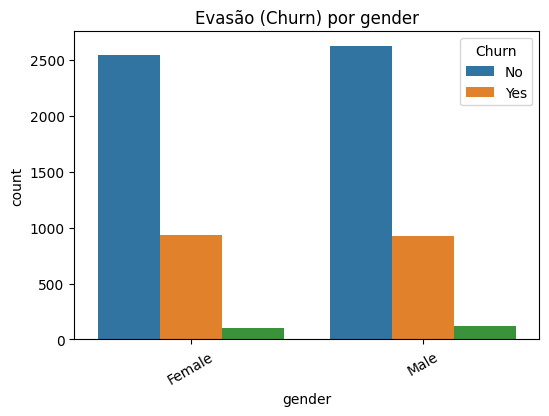

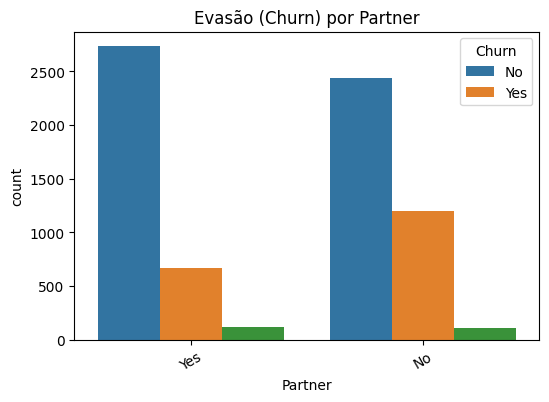

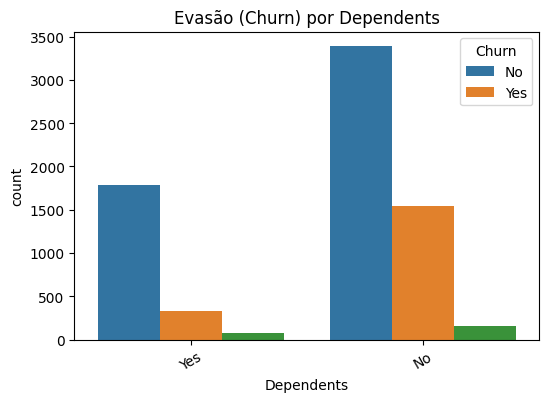

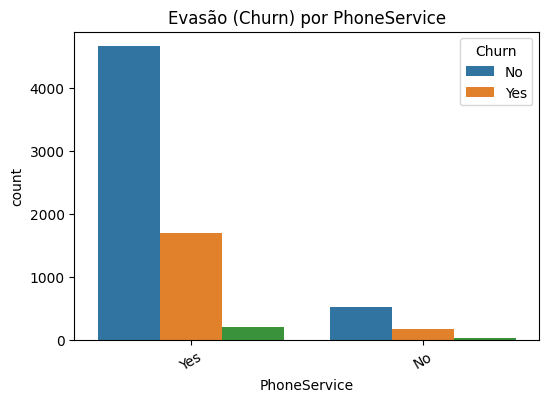

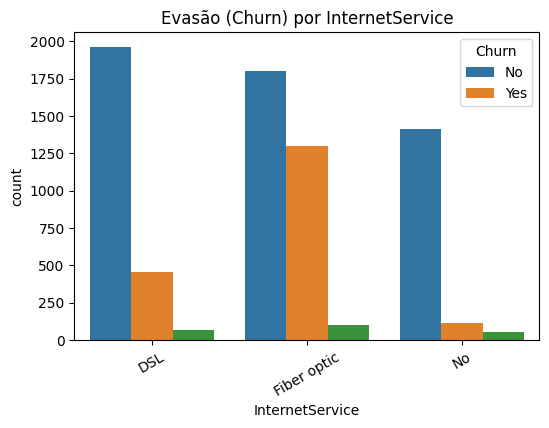

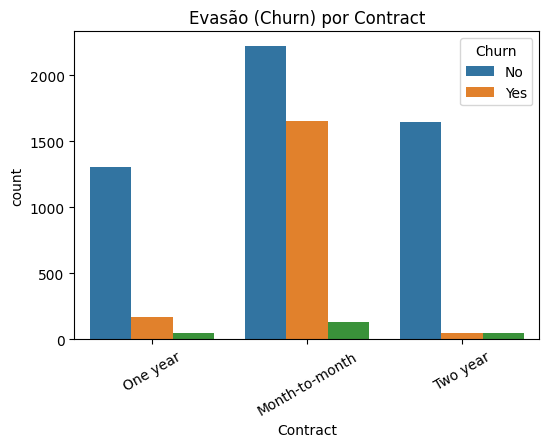

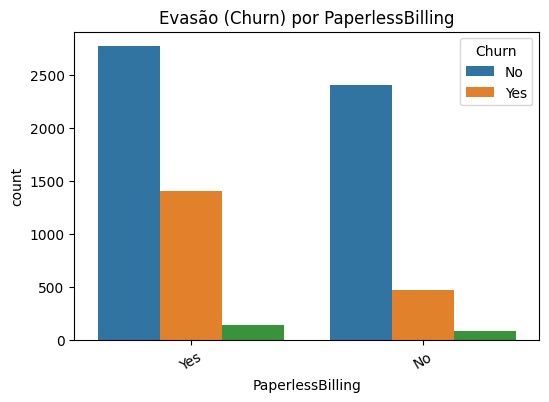

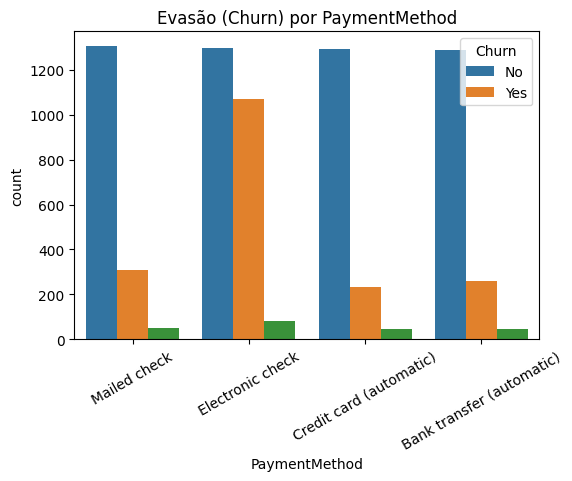

In [ ]:
categorical_vars = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df_clean)
    plt.title(f"Evasão (Churn) por {col}")
    plt.xticks(rotation=30)
    plt.show()
